<a href="https://colab.research.google.com/github/preritt/Embed/blob/master/EpochBasedSatimFullDataset04202019_SGD_TBC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import packages

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
import tensorflow as tf

In [0]:
# Load data
train_data = np.load('X_train.npy')
train_label = np.load('y_train.npy')
validation_data = np.load('X_validation.npy')
validation_label = np.load('y_validation.npy')
test_data = np.load('X_test.npy')
test_label = np.load('y_test.npy')

In [3]:
# Visualize data
train_data_pandas = pd.DataFrame(train_data)
train_data_labels = pd.DataFrame(train_label)
train_data_pandas.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.0000,0.127273,-0.095238,-0.289256,0.032258,0.054545,-0.157895,-0.265625,-0.2500,-0.106796,...,-0.517241,-0.600000,-0.138462,-0.188119,-0.431579,-0.546875,-0.15625,-0.126214,-0.431579,-0.484375
1,0.0000,-0.090909,-0.571429,-0.603306,-0.096774,-0.090909,-0.494737,-0.562500,-0.2500,-0.106796,...,-0.517241,-0.600000,-0.015385,-0.049505,-0.431579,-0.609375,-0.15625,-0.126214,-0.494737,-0.609375
2,0.5625,0.490909,0.333333,-0.074380,0.354839,0.327273,0.052632,-0.187500,0.1875,0.242718,...,0.103448,-0.233333,0.200000,0.207921,-0.010526,-0.312500,-0.15625,0.009709,-0.326316,-0.437500
3,0.0000,-0.018182,-0.380952,-0.471074,-0.225806,-0.163636,-0.410526,-0.437500,-0.3750,-0.242718,...,-0.011494,-0.383333,-0.138462,-0.049505,-0.347368,-0.484375,0.09375,0.087379,-0.031579,-0.218750
4,0.0000,-0.018182,-0.285714,-0.471074,0.032258,-0.090909,-0.326316,-0.500000,-0.1250,-0.184466,...,0.287356,-0.183333,0.230769,0.267327,-0.031579,-0.281250,-0.03125,-0.126214,-0.431579,-0.546875


In [4]:
train_data_labels.head()

,0
0,5
1,5
2,5
3,5
4,5


In [5]:
test_data.shape

(2000, 36)

In [6]:
validation_data.shape

(1331, 36)

#### Combine Validation and train data for MLP classifier - and set validation fraction to 4500/15000 = 0.3

In [7]:
train_valid_combined = np.concatenate((train_data, validation_data))
train_valid_combined.shape

(4435, 36)

In [0]:
train_valid_label = np.concatenate((train_label, validation_label))


#### Fit MLP Classifier

In [0]:
# clf = MLPClassifier(hidden_layer_sizes=(104),validation_fraction=0.3)
# clf.fit(train_data, train_label)

In [10]:
20*90/36

50.0

In [11]:
clf =MLPClassifier(hidden_layer_sizes=(90, ), max_iter=200, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-5, random_state=1,
                    learning_rate_init=.1)

# Test set score: 0.950119

# clf.fit(train_valid_combined, train_valid_label)
clf.fit(train_data, train_label)

Iteration 1, loss = 0.95444174
Iteration 2, loss = 0.41361696
Iteration 3, loss = 0.37376292
Iteration 4, loss = 0.35310299
Iteration 5, loss = 0.33669458
Iteration 6, loss = 0.32397037
Iteration 7, loss = 0.31519296
Iteration 8, loss = 0.30943933
Iteration 9, loss = 0.30110286
Iteration 10, loss = 0.29639559
Iteration 11, loss = 0.29181714
Iteration 12, loss = 0.28519907
Iteration 13, loss = 0.27945018
Iteration 14, loss = 0.27446988
Iteration 15, loss = 0.27230486
Iteration 16, loss = 0.26854954
Iteration 17, loss = 0.26347512
Iteration 18, loss = 0.25999897
Iteration 19, loss = 0.25824005
Iteration 20, loss = 0.25456133
Iteration 21, loss = 0.24952501
Iteration 22, loss = 0.24607191
Iteration 23, loss = 0.24673228
Iteration 24, loss = 0.24442729
Iteration 25, loss = 0.24115307
Iteration 26, loss = 0.23827513
Iteration 27, loss = 0.23520357
Iteration 28, loss = 0.23354455
Iteration 29, loss = 0.22978524
Iteration 30, loss = 0.22810795
Iteration 31, loss = 0.22567502
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(90,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='sgd', tol=1e-05,
       validation_fraction=0.1, verbose=10, warm_start=False)

#### Train Accuracy

In [12]:
clf.score(train_data,train_label)

0.9710051546391752

#### Validation Accuracy

In [13]:
clf.score(validation_data,validation_label)

0.8858001502629602

#### Test accuracy

In [14]:
clf.score(test_data,test_label)

0.898

#### Tensorflow model using weights initialized from numpy model

In [0]:
enc = OneHotEncoder(handle_unknown='ignore',sparse=False)
enc.fit(train_label.reshape(1,-1).T)
train_label_one_hot = enc.transform(train_label.reshape(-1,1))
test_label_one_hot = enc.transform(test_label.reshape(-1,1))
validation_label_one_hot = enc.transform(validation_label.reshape(-1,1))
validation_test_label_one_hot = enc.transform(train_valid_label.reshape(-1,1))

In [0]:
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]
    
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [0]:
# hid_neuron = [90]

In [18]:
test_label_one_hot.shape

(2000, 6)

#### Base NN model in tensor flow

#### 36 -> 90 -> 6

## Train baseline model in tensorflow

In [0]:
#

In [20]:
train_data.shape

(3104, 36)

In [0]:
def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random_normal(shape=size, stddev=xavier_stddev, seed=1000)

In [0]:
output_shape = train_label_one_hot.shape[1]

In [23]:
## Define weights of the layer

G_W1 = tf.Variable(np.float32(clf.coefs_[0]))
G_b1 = tf.Variable(np.float32(clf.intercepts_ [0]))

G_W2 =  tf.Variable(np.float32(clf.coefs_[1]))
G_b2 = tf.Variable(np.float32(clf.intercepts_ [1]))


saver = tf.train.Saver()

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# tf.train.GradientDescentOptimizer

In [0]:
## Building the graph - Best!
saver = tf.train.Saver()
learning_rate = 0.001
hid_neuron = [374]
num_steps = 20000
batch_size = 200
train_losses = []
test_acc = []
X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
#     layer_2 = tf.matmul(layer_1, G_W2) + G_b2
#     layer_2 = tf.nn.relu(layer_2)
    out_layer = tf.matmul(layer_1, G_W2) + G_b2
    layer_outputs.append(out_layer)
    return out_layer

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X), labels=Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)

train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net(X), 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

  ### Initialization and running the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    best_accuracy_valid = 0
    for step in range(0, num_steps):
        batch_x, batch_y = next_batch(batch_size, train_data, train_label_one_hot)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % 1000 == 0:
            train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
            print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
            train_losses.append(train_loss)
            validation_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
            if step%1000 == 0:
              print("Validation Accuracy {} ...".format(validation_accuracy))
              print()
              if (validation_accuracy >= best_accuracy_valid):
                best_accuracy_valid = validation_accuracy
                saver.save(sess, './statlog_letter')
                test_Accuracy = sess.run(accuracy*100, feed_dict={X: test_data,Y:test_label_one_hot})
    print("Test acc=",str(test_Accuracy), "%")
    print("Valid acc=",str(best_accuracy_valid), "%")

    print("="*50)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

step 0, training loss= 0.09654394, training acc= 96.49999737739563%
Validation Accuracy 88.58000946044922 ...

step 1000, training loss= 0.074345045, training acc= 97.50000238418579%
Validation Accuracy 88.65514373779297 ...

step 2000, training loss= 0.0795926, training acc= 99.00000095367432%
Validation Accuracy 88.80540466308594 ...

step 3000, training loss= 0.09808998, training acc= 97.00000286102295%
Validation Accuracy 88.80540466308594 ...

step 4000, training loss= 0.07493803, training acc= 97.50000238418579%
Validation Accuracy 88.80540466308594 ...

step 5000, training loss= 0.095866315, training acc= 97.00000286102295%
Validation Accuracy 88.80540466308594 ...

step 6000, training loss= 0.07703011, training acc= 98.00000190734863%
Validation Accuracy 88.80540466308594 ...

step 7000, tr

#### My model with feedback

## Divide valid in two parts for validation and validation-test¶

In [24]:
print(validation_data.shape)
print(train_data.shape)

(1331, 36)
(3104, 36)


In [0]:
valid_validation_data = validation_data[0:1000,:]
valid_validation_data_label = validation_label_one_hot[0:1000,:]
valid_test_data = validation_data[1000:,:]
valid_test_data_label = validation_label_one_hot[1000:,:]

In [0]:
output_shape = train_label_one_hot.shape[1]

In [0]:
## Define weights of the layer
G_W1 = tf.Variable(np.float32(clf.coefs_[0]))
G_b1 = tf.Variable(np.float32(clf.intercepts_ [0]))

G_W2 =  tf.Variable(np.float32(clf.coefs_[1]))
G_b2 = tf.Variable(np.float32(clf.intercepts_ [1]))

num_hidden_neurons = 90
GwLoop = tf.Variable(xavier_init([output_shape,num_hidden_neurons]))
G_bLoop = tf.Variable(tf.zeros(shape=[num_hidden_neurons]))

GwLoop2 = tf.Variable(xavier_init([num_hidden_neurons,num_hidden_neurons]))
G_bLoop2 = tf.Variable(tf.zeros(shape=[num_hidden_neurons]))

GLossW = tf.Variable(xavier_init([output_shape,output_shape]))
GLossb= tf.Variable(tf.zeros(shape=[output_shape]))
saver = tf.train.Saver()

In [0]:
valid_validation_data = validation_data[0:1000,:]
valid_validation_data_label = validation_label_one_hot[0:1000,:]
valid_test_data = validation_data[1000:,:]
valid_test_data_label = validation_label_one_hot[1000:,:]

In [29]:
valid_validation_data_label

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [0]:
# plt.scatter(np.argmax(valid_validation_data_label,axis = 0))

(array([262.,   0.,  89.,   0., 152.,   0., 103.,   0., 165., 229.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

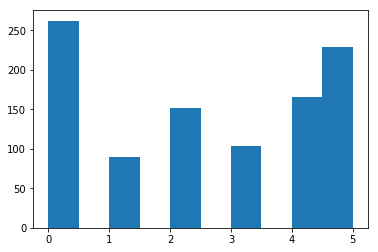

In [31]:
plt.hist(np.argmax(valid_validation_data_label,axis = 1))

In [32]:
train_data.shape

(3104, 36)

## Hyperparameter tuning

In [36]:

## Building the graph
# saver = tf.train.Saver()
# hid_neuron = [90]
num_steps = 30000
batch_size = 2056
train_losses = []
test_acc = []
plot_every = 100
number_of_epoch = 10000
# learning_rate = 0.001
lr = tf.placeholder(tf.float32, shape = [])
number_of_ex = train_data.shape[0]

total_steps_for_one_pass = number_of_ex//batch_size + 1


X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
weights = {
    'h1': tf.Variable(np.float32(clf.coefs_[0])),
    'out': tf.Variable(np.float32(clf.coefs_[1]))
}
biases = {
    'b1': tf.Variable(np.float32(clf.intercepts_ [0])),
    'out': tf.Variable(np.float32(clf.intercepts_ [1]))
}
saver = tf.train.Saver()
W_track = []
ValidAccuracy_Track = []
ValidAccuracy_Test_track = []
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
    out_layer = tf.matmul(layer_1, G_W2) + G_b2
    layer_outputs.append(out_layer)
    for loop in range(0,2):        
        layer1_feedback1 = tf.add(tf.matmul(out_layer, GwLoop), G_bLoop)
        layer1_feedback1 = tf.nn.relu(layer1_feedback1)
        layer1_feedback2 = tf.add(tf.matmul(layer1_feedback1, GwLoop2), G_bLoop2)
        layer1_feedback2 = tf.nn.tanh(layer1_feedback2)
        layer_1 = layer_1 + layer1_feedback2 + tf.add(tf.matmul(x, G_W1), G_b1)
        out_layer = (tf.matmul(layer_1, G_W2) + G_b2) + tf.nn.tanh((tf.matmul(out_layer, GLossW) + GLossb))
        layer_outputs.append(out_layer)
    if train == True:
        return layer_outputs
    else:
        return layer_outputs[0]
    
for wL1 in range(1,7):
  for WL2 in range(1,wL1+1):
    for WL3 in range(0,2):

        wLoss1 = wL1
        wLoss2 = WL2
        wLoss3 = WL3
        loss1 = wLoss1*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[0], labels=Y))
        loss2 = wLoss2*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[1], labels=Y))
        loss3 = wLoss3*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[2], labels=Y))

        loss = (loss1+loss2+loss3)/(wLoss1+ wLoss2 + wLoss3)
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)

        train_op = optimizer.minimize(loss)
        correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

        ### Initialization and running the model
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            best_accuracy_valid = 0
            for ep in range(0,number_of_epoch):
              if ep<5000:
                learn = .1
              elif ep >=5000 and ep <= 8000:
                learn = .01
              else:
                learn = .001
              for step in range(0, total_steps_for_one_pass):

                if step>=number_of_ex//batch_size:
                  batch_x, batch_y = train_data[step*batch_size:,:],train_label_one_hot[step*batch_size:,:]
        #           print(step,'Finishing',step*batch_size )
                  step = 0

                else:

                  start = step*batch_size
                  finish = (step+1)*batch_size
        #           print(step,'Doing', 'Start = ', start, "Finish = ", finish)
                  batch_x, batch_y = train_data[step:finish,:],train_label_one_hot[step:finish,:]
        #         batch_x, batch_y = next_batch(batch_size, combined_train_valid, combined_train_valid_label)
                sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, lr: learn})              



  #                 batch_x, batch_y = next_batch(batch_size, train_data, train_label_one_hot)
  #                 sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
              if ep % plot_every == 0:
                  train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
                  print("epoch " + str(ep) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
                  train_losses.append(train_loss)
                  validation_accuracy = sess.run(accuracy*100, feed_dict={X: valid_validation_data,Y:valid_validation_data_label})
                  if ep%plot_every == 0:
                    print("Validation Accuracy valid {} ...".format(validation_accuracy))
                    print()
                    if (validation_accuracy >= best_accuracy_valid):
                      best_accuracy_valid = validation_accuracy
                      saver.save(sess, './statimgTrack')
                      G_W1np, G_b1np, G_W2np, G_b2np = sess.run([G_W1, G_b1, G_W2, G_b2])
            print("Valid acc=",str(best_accuracy_valid), "%")
            ValidAccuracy_Track.append(best_accuracy_valid)
            this_params = G_W1np, G_b1np, G_W2np, G_b2np
            W_track.append(this_params)
            # code for checking accuracy of valid_test
            validation_test_accuracy = sess.run(accuracy*100, feed_dict={X: valid_test_data,Y:valid_test_data_label})
            ValidAccuracy_Test_track.append(validation_test_accuracy)
            print("Validation Accuracy Test {} ...".format(validation_test_accuracy))
            print("="*50)
            print("W1 = {} ...".format(wLoss1))
            print("W2 = {} ...".format(wLoss2))
            print("W3 = {} ...".format(wLoss3))

            print("*"*50)
            print("="*50)


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

epoch 0, training loss= 1.2723517, training acc= 90.74427485466003%
Validation Accuracy valid 86.29999542236328 ...

epoch 100, training loss= 0.068641186, training acc= 97.32824563980103%
Validation Accuracy valid 89.4000015258789 ...

epoch 200, training loss= 0.061056677, training acc= 97.61450290679932%
Validation Accuracy valid 89.60000610351562 ...

epoch 300, training loss= 0.05856128, training acc= 97.80534505844116%
Validation Accuracy valid 89.9000015258789 ...

epoch 400, training loss= 0.056335583, training acc= 97.80534505844116%
Validation Accuracy valid 89.9000015258789 ...

epoch 500, training loss= 0.049599793, training acc= 97.99618124961853%
Validation Accuracy valid 89.70000457763672 ...

epoch 600, training loss= 0.051838905, training acc= 97.80534505844116%
Validation Accuracy

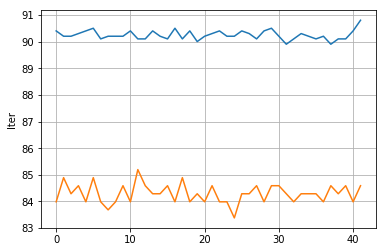

In [39]:
import matplotlib.pyplot as plt
plt.plot(ValidAccuracy_Track)
plt.plot(ValidAccuracy_Test_track)

plt.ylabel('Iter')
plt.grid(abs)
plt.show()

In [40]:
print(np.max(ValidAccuracy_Track))
print(np.argmax(ValidAccuracy_Track))

90.8
41


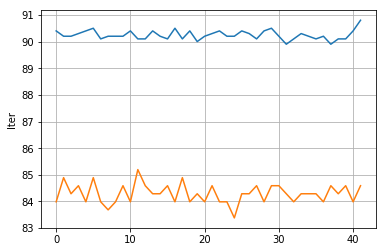

In [37]:
import matplotlib.pyplot as plt
plt.plot(ValidAccuracy_Track)
plt.plot(ValidAccuracy_Test_track)

plt.ylabel('Iter')
plt.grid(abs)
plt.show()

In [38]:
print(np.max(ValidAccuracy_Track))
print(np.argmax(ValidAccuracy_Track))


90.8
41


#### weights are 6,6,1

In [0]:
shuffling_indices_validation_data = np.random.permutation(validation_data.shape[0])

In [34]:
shuffling_indices_validation_data.shape

(1331,)

In [0]:
shuffled_validation_data = validation_data[shuffling_indices_validation_data,:]
shuffled_validation_label = validation_label_one_hot[shuffling_indices_validation_data,:]
train_valid_combined_shuffled = np.concatenate((train_data, shuffled_validation_data))
train_valid_combined_shuffled_label = np.concatenate((train_label_one_hot, shuffled_validation_label))


(array([291.,   0.,  95.,   0., 163.,   0., 109.,   0., 176., 497.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

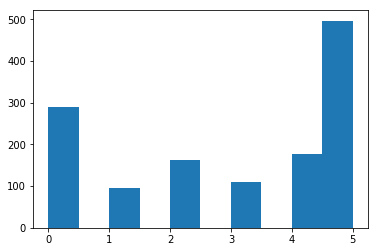

In [36]:
plt.hist(np.argmax(validation_label_one_hot,axis = 1))

In [0]:
# # keep aside 
# aside_examples= 300
# aside_valid_test = train_valid_combined_shuffled[-aside_examples:]
# aside_valid_test_label = train_valid_combined_shuffled_label[-aside_examples:]
# combined_train_valid = train_valid_combined_shuffled[:train_valid_combined.shape[0]-aside_examples,:]
# combined_train_valid_label = train_valid_combined_shuffled_label[:train_valid_combined.shape[0]-aside_examples,:]

In [38]:
train_valid_combined_shuffled.shape

(4435, 36)

In [0]:
# keep aside 
aside_examples= 400
aside_valid_test = train_valid_combined_shuffled[-aside_examples:]
aside_valid_test_label = train_valid_combined_shuffled_label[-aside_examples:]
combined_train_valid = train_valid_combined_shuffled[:train_valid_combined.shape[0]-aside_examples,:]
combined_train_valid_label = train_valid_combined_shuffled_label[:train_valid_combined.shape[0]-aside_examples,:]

(array([ 82.,   0.,  29.,   0.,  52.,   0.,  25.,   0.,  57., 155.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

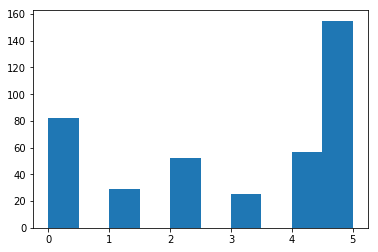

In [75]:
plt.hist(np.argmax(aside_valid_test_label,axis = 1))

## Determine how many epochs are required

In [78]:
## 123 Building the graph - Best!
saver = tf.train.Saver()
number_of_ex = combined_train_valid.shape[0]
hid_neuron = [104]
num_steps = 20000
# num_steps = 20000
number_of_epoch = 20000
batch_size = 2056
# batch_size = train_data.shape[0]

train_losses = []
test_acc = []
train_accuracy = []
val_accuracy = []
plot_every = 1000
best_accuracy_valid = 0
learning_rate = 0.001
track_step = []
tracked_valid_accuracy = []
total_steps_for_one_pass = number_of_ex//batch_size + 1
step = 0
X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
lr = tf.placeholder(tf.float32, shape = [])
W_track = []
ValidAccuracy_Track = []
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
    out_layer = tf.matmul(layer_1, G_W2) + G_b2
    layer_outputs.append(out_layer)
    for loop in range(0,2):        
        layer1_feedback1 = tf.add(tf.matmul(out_layer, GwLoop), G_bLoop)
        layer1_feedback1 = tf.nn.relu(layer1_feedback1)
        layer1_feedback2 = tf.add(tf.matmul(layer1_feedback1, GwLoop2), G_bLoop2)
        layer1_feedback2 = tf.nn.tanh(layer1_feedback2)
        layer_1 = layer_1 + layer1_feedback2 + tf.add(tf.matmul(x, G_W1), G_b1)
        out_layer = (tf.matmul(layer_1, G_W2) + G_b2) + tf.nn.tanh((tf.matmul(out_layer, GLossW) + GLossb))
        layer_outputs.append(out_layer)
    if train == True:
        return layer_outputs
    else:
        return layer_outputs[0]



wLoss1 = 6
wLoss2 = 6
wLoss3 = 1
loss1 = wLoss1*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[0], labels=Y))
loss2 = wLoss2*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[1], labels=Y))
loss3 = wLoss3*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[2], labels=Y))

loss = (loss1+loss2+loss3)/(wLoss1+ wLoss2 + wLoss3)


optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)

train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Initialization and running the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    best_accuracy_valid = 0
    for ep in range(0,number_of_epoch):
      if ep<5000:
        learn = .1
      elif ep >=5000 and ep <= 8000:
        learn = .1
      else:
        learn = .01
      for step in range(0, total_steps_for_one_pass):
#         print(step)
#         if (step>5000):
#           plot_every = 10
        
        if step>=number_of_ex//batch_size:
          batch_x, batch_y = combined_train_valid[step*batch_size:,:],combined_train_valid_label[step*batch_size:,:]
#           print(step,'Finishing',step*batch_size )
          step = 0
          
        else:
          
          start = step*batch_size
          finish = (step+1)*batch_size
#           print(step,'Doing', 'Start = ', start, "Finish = ", finish)
          batch_x, batch_y = combined_train_valid[step:finish,:],combined_train_valid_label[step:finish,:]
#         batch_x, batch_y = next_batch(batch_size, combined_train_valid, combined_train_valid_label)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, lr: learn})
      if ep % plot_every == 0:
          train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
#             train_accuracy.append(train_acc)
#             print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
          track_step.append(step)
          train_loss_total, train_acc_total = sess.run([loss, accuracy], feed_dict={X: combined_train_valid,Y: combined_train_valid_label})
          train_accuracy.append(train_acc_total)
          train_losses.append(train_loss_total)
          print("epoch " + str(ep) + ", training loss Total= " + str(train_loss_total) +", training acc total= "+str(train_acc_total*100)+"%")
          validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
          print("ValidTest acc=",str(validationTest_accuracy), "%")
          tracked_valid_accuracy.append(validationTest_accuracy)
          if ep%plot_every == 0:
            if (validationTest_accuracy >= best_accuracy_valid):
              best_accuracy_valid = validationTest_accuracy
              saver.save(sess, './statlog_letterReducedSGD')
              G_W1np, G_b1np, G_W2np, G_b2np = sess.run([G_W1, G_b1, G_W2, G_b2])
  #         if(train_loss_total<0.033881765):
  #           break
                                         
    validationValid_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
    print("ValidValid acc=",str(validationValid_accuracy), "%")
    
    validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
    print("ValidTest acc=",str(validationTest_accuracy), "%")
    this_params = G_W1np, G_b1np, G_W2np, G_b2np
    W_track.append(this_params)
#     saver.save(sess, './statlog_letterAdam')
    print("="*50)
    print("W1")
    print(wLoss1)

    print("W2")
    print(wLoss2)
    print("*"*50)
    
    print("="*50)

epoch 0, training loss Total= 2.5011463, training acc total= 88.77323269844055%
ValidTest acc= 89.25 %
epoch 1000, training loss Total= 0.10494255, training acc total= 95.46468257904053%
ValidTest acc= 90.25 %
epoch 2000, training loss Total= 0.08661257, training acc total= 95.93556523323059%
ValidTest acc= 91.5 %
epoch 3000, training loss Total= 0.07774317, training acc total= 96.2081789970398%
ValidTest acc= 91.5 %
epoch 4000, training loss Total= 0.0705792, training acc total= 96.28252983093262%
ValidTest acc= 91.5 %
epoch 5000, training loss Total= 0.059275158, training acc total= 96.57992720603943%
ValidTest acc= 91.75 %
epoch 6000, training loss Total= 0.055875786, training acc total= 96.82775735855103%
ValidTest acc= 92.0 %
epoch 7000, training loss Total= 0.051685873, training acc total= 96.90210819244385%
ValidTest acc= 92.25 %
epoch 8000, training loss Total= 0.04950832, training acc total= 97.05080389976501%
ValidTest acc= 92.25 %
epoch 9000, training loss Total= 0.049083073

#### fine tune for higher precision for no. epochs

In [79]:
## 123 Building the graph - Best!
saver = tf.train.Saver()
number_of_ex = combined_train_valid.shape[0]
hid_neuron = [104]
num_steps = 150000
# num_steps = 20000
number_of_epoch = 10000
batch_size = 2056
# batch_size = train_data.shape[0]

train_losses = []
test_acc = []
train_accuracy = []
val_accuracy = []
plot_every = 1000
best_accuracy_valid = 0
learning_rate = 0.001
track_step = []
tracked_valid_accuracy = []
total_steps_for_one_pass = number_of_ex//batch_size + 1
step = 0
X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
lr = tf.placeholder(tf.float32, shape = [])
W_track = []
ValidAccuracy_Track = []
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
    out_layer = tf.matmul(layer_1, G_W2) + G_b2
    layer_outputs.append(out_layer)
    for loop in range(0,2):        
        layer1_feedback1 = tf.add(tf.matmul(out_layer, GwLoop), G_bLoop)
        layer1_feedback1 = tf.nn.relu(layer1_feedback1)
        layer1_feedback2 = tf.add(tf.matmul(layer1_feedback1, GwLoop2), G_bLoop2)
        layer1_feedback2 = tf.nn.tanh(layer1_feedback2)
        layer_1 = layer_1 + layer1_feedback2 + tf.add(tf.matmul(x, G_W1), G_b1)
        out_layer = (tf.matmul(layer_1, G_W2) + G_b2) + tf.nn.tanh((tf.matmul(out_layer, GLossW) + GLossb))
        layer_outputs.append(out_layer)
    if train == True:
        return layer_outputs
    else:
        return layer_outputs[0]



wLoss1 = 6
wLoss2 = 6
wLoss3 = 1
loss1 = wLoss1*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[0], labels=Y))
loss2 = wLoss2*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[1], labels=Y))
loss3 = wLoss3*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[2], labels=Y))

loss = (loss1+loss2+loss3)/(wLoss1+ wLoss2 + wLoss3)


optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)

train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Initialization and running the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    best_accuracy_valid = 0
    for ep in range(0,number_of_epoch):
      if ep<5000:
        learn = .1
      elif ep >=5000 and ep <= 8000:
        learn = .1
      else:
        learn = .01
      if ep>8000:
        plot_every = 100
      for step in range(0, total_steps_for_one_pass):
#         print(step)
#         if (step>5000):
#           plot_every = 10
        
        if step>=number_of_ex//batch_size:
          batch_x, batch_y = combined_train_valid[step*batch_size:,:],combined_train_valid_label[step*batch_size:,:]
#           print(step,'Finishing',step*batch_size )
          step = 0
          
        else:
          
          start = step*batch_size
          finish = (step+1)*batch_size
#           print(step,'Doing', 'Start = ', start, "Finish = ", finish)
          batch_x, batch_y = combined_train_valid[step:finish,:],combined_train_valid_label[step:finish,:]
#         batch_x, batch_y = next_batch(batch_size, combined_train_valid, combined_train_valid_label)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, lr: learn})
      if ep % plot_every == 0:
          train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
#             train_accuracy.append(train_acc)
#             print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
          track_step.append(step)
          train_loss_total, train_acc_total = sess.run([loss, accuracy], feed_dict={X: combined_train_valid,Y: combined_train_valid_label})
          train_accuracy.append(train_acc_total)
          train_losses.append(train_loss_total)
          print("epoch " + str(ep) + ", training loss Total= " + str(train_loss_total) +", training acc total= "+str(train_acc_total*100)+"%")
          validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
          print("ValidTest acc=",str(validationTest_accuracy), "%")
          tracked_valid_accuracy.append(validationTest_accuracy)
          if ep%plot_every == 0:
            if (validationTest_accuracy >= best_accuracy_valid):
              best_accuracy_valid = validationTest_accuracy
              saver.save(sess, './statlog_letterReducedSGD')
              G_W1np, G_b1np, G_W2np, G_b2np = sess.run([G_W1, G_b1, G_W2, G_b2])
  #         if(train_loss_total<0.033881765):
  #           break
                                         
    validationValid_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
    print("ValidValid acc=",str(validationValid_accuracy), "%")
    
    validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
    print("ValidTest acc=",str(validationTest_accuracy), "%")
    this_params = G_W1np, G_b1np, G_W2np, G_b2np
    W_track.append(this_params)
#     saver.save(sess, './statlog_letterAdam')
    print("="*50)
    print("W1")
    print(wLoss1)

    print("W2")
    print(wLoss2)
    print("*"*50)
    
    print("="*50)

epoch 0, training loss Total= 2.5011463, training acc total= 88.77323269844055%
ValidTest acc= 89.25 %
epoch 1000, training loss Total= 0.10494255, training acc total= 95.46468257904053%
ValidTest acc= 90.25 %
epoch 2000, training loss Total= 0.08661257, training acc total= 95.93556523323059%
ValidTest acc= 91.5 %
epoch 3000, training loss Total= 0.07774317, training acc total= 96.2081789970398%
ValidTest acc= 91.5 %
epoch 4000, training loss Total= 0.0705792, training acc total= 96.28252983093262%
ValidTest acc= 91.5 %
epoch 5000, training loss Total= 0.059275158, training acc total= 96.57992720603943%
ValidTest acc= 91.75 %
epoch 6000, training loss Total= 0.055875786, training acc total= 96.82775735855103%
ValidTest acc= 92.0 %
epoch 7000, training loss Total= 0.051685873, training acc total= 96.90210819244385%
ValidTest acc= 92.25 %
epoch 8000, training loss Total= 0.04950832, training acc total= 97.05080389976501%
ValidTest acc= 92.25 %
epoch 8100, training loss Total= 0.049448416

#### Train entire data till 10000 epochs

In [0]:
# keep aside 
aside_examples= 1
aside_valid_test = train_valid_combined_shuffled[-aside_examples:]
aside_valid_test_label = train_valid_combined_shuffled_label[-aside_examples:]
combined_train_valid = train_valid_combined_shuffled[:train_valid_combined.shape[0]-aside_examples,:]
combined_train_valid_label = train_valid_combined_shuffled_label[:train_valid_combined.shape[0]-aside_examples,:]

In [0]:
# train_valid_combined_shuffled.shape

In [83]:
## 123 Building the graph - Best!
saver = tf.train.Saver()
number_of_ex = combined_train_valid.shape[0]
hid_neuron = [104]
num_steps = 150000
# num_steps = 20000
number_of_epoch = 9500
batch_size = 2056
# batch_size = train_data.shape[0]

train_losses = []
test_acc = []
train_accuracy = []
val_accuracy = []
plot_every = 1000
best_accuracy_valid = 0
# learning_rate = 0.001
track_step = []
tracked_valid_accuracy = []
total_steps_for_one_pass = number_of_ex//batch_size + 1
step = 0
X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
lr = tf.placeholder(tf.float32, shape = [])
W_track = []
ValidAccuracy_Track = []
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
    out_layer = tf.matmul(layer_1, G_W2) + G_b2
    layer_outputs.append(out_layer)
    for loop in range(0,2):        
        layer1_feedback1 = tf.add(tf.matmul(out_layer, GwLoop), G_bLoop)
        layer1_feedback1 = tf.nn.relu(layer1_feedback1)
        layer1_feedback2 = tf.add(tf.matmul(layer1_feedback1, GwLoop2), G_bLoop2)
        layer1_feedback2 = tf.nn.tanh(layer1_feedback2)
        layer_1 = layer_1 + layer1_feedback2 + tf.add(tf.matmul(x, G_W1), G_b1)
        out_layer = (tf.matmul(layer_1, G_W2) + G_b2) + tf.nn.tanh((tf.matmul(out_layer, GLossW) + GLossb))
        layer_outputs.append(out_layer)
    if train == True:
        return layer_outputs
    else:
        return layer_outputs[0]



wLoss1 = 6
wLoss2 = 6
wLoss3 = 1
loss1 = wLoss1*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[0], labels=Y))
loss2 = wLoss2*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[1], labels=Y))
loss3 = wLoss3*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[2], labels=Y))

loss = (loss1+loss2+loss3)/(wLoss1+ wLoss2 + wLoss3)


optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)

train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Initialization and running the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    best_accuracy_valid = 0
    for ep in range(0,number_of_epoch):
      if ep<5000:
        learn = .1
      elif ep >=5000 and ep <= 8000:
        learn = .1
      else:
        learn = .01
      if ep>8000:
        plot_every = 100
      for step in range(0, total_steps_for_one_pass):
#         print(step)
#         if (step>5000):
#           plot_every = 10
        
        if step>=number_of_ex//batch_size:
          batch_x, batch_y = combined_train_valid[step*batch_size:,:],combined_train_valid_label[step*batch_size:,:]
#           print(step,'Finishing',step*batch_size )
          step = 0
          
        else:
          
          start = step*batch_size
          finish = (step+1)*batch_size
#           print(step,'Doing', 'Start = ', start, "Finish = ", finish)
          batch_x, batch_y = combined_train_valid[step:finish,:],combined_train_valid_label[step:finish,:]
#         batch_x, batch_y = next_batch(batch_size, combined_train_valid, combined_train_valid_label)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, lr: learn})
      if ep % plot_every == 0:
          train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
#             train_accuracy.append(train_acc)
#             print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
          track_step.append(step)
          train_loss_total, train_acc_total = sess.run([loss, accuracy], feed_dict={X: combined_train_valid,Y: combined_train_valid_label})
          train_accuracy.append(train_acc_total)
          train_losses.append(train_loss_total)
          print("epoch " + str(ep) + ", training loss Total= " + str(train_loss_total) +", training acc total= "+str(train_acc_total*100)+"%")
          validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
#           print("ValidTest acc=",str(validationTest_accuracy), "%")
          tracked_valid_accuracy.append(validationTest_accuracy)
#           if ep%plot_every == 0:
#             if (validationTest_accuracy >= best_accuracy_valid):
#               best_accuracy_valid = validationTest_accuracy
#               saver.save(sess, './statlog_letterReducedSGD')
#               G_W1np, G_b1np, G_W2np, G_b2np = sess.run([G_W1, G_b1, G_W2, G_b2])
  #         if(train_loss_total<0.033881765):
  #           break
                                         
#     validationValid_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
#     print("ValidValid acc=",str(validationValid_accuracy), "%")
    
#     validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
#     print("ValidTest acc=",str(validationTest_accuracy), "%")
    train_loss_total, train_acc_total = sess.run([loss, accuracy], feed_dict={X: combined_train_valid,Y: combined_train_valid_label})
    print("Train acc=",str(train_acc_total), "%")
    this_params = G_W1np, G_b1np, G_W2np, G_b2np
    W_track.append(this_params)
    saver.save(sess, './statlog_satimFullSGDFinal')
    print("="*50)
    print("W1")
    print(wLoss1)

    print("W2")
    print(wLoss2)
    print("*"*50)
    
    print("="*50)

epoch 0, training loss Total= 1.6421824, training acc total= 89.24221992492676%
epoch 1000, training loss Total= 0.1167705, training acc total= 95.24131417274475%
epoch 2000, training loss Total= 0.10244689, training acc total= 95.82769274711609%
epoch 3000, training loss Total= 0.091625914, training acc total= 95.94045877456665%
epoch 4000, training loss Total= 0.08408962, training acc total= 96.23364806175232%
epoch 5000, training loss Total= 0.073307745, training acc total= 96.32385969161987%
epoch 6000, training loss Total= 0.066499114, training acc total= 96.52683734893799%
epoch 7000, training loss Total= 0.060303714, training acc total= 96.68470621109009%
epoch 8000, training loss Total= 0.05692737, training acc total= 96.68470621109009%
epoch 8100, training loss Total= 0.056117997, training acc total= 96.68470621109009%
epoch 8200, training loss Total= 0.055982567, training acc total= 96.66215777397156%
epoch 8300, training loss Total= 0.0558603, training acc total= 96.66215777

## Check on test set!

In [84]:
with tf.Session() as sess:
    saver.restore(sess, './statlog_satimFullSGDFinal')
    train_loss_total, train_acc_total = sess.run([loss, accuracy], feed_dict={X: combined_train_valid,Y: combined_train_valid_label})
    print("Train acc=",str(train_acc_total), "%")
    test_accuracy = sess.run(accuracy*100, feed_dict={X: test_data,Y:test_label_one_hot})
    print("Test acc=",str(test_accuracy), "%")

INFO:tensorflow:Restoring parameters from ./statlog_satimFullSGDFinal
Train acc= 0.96729815 %
Test acc= 90.15 %
